# Brute Force vs. Random Search

Optimizazio problema baten aurrean gaudenean, eta soluziorik onena aurkitzea denean gure xedea, aukeretako bat, existitzen diren soluzio posible guztiak ebaluatzea da. Estrategia edo algoritmo horri <i> Brute-Force</i> deritzo. Noski, algoritmo hori ez da beti erabilgarria, existitzen diren soluzio guztiak ebaluatzeak kostu altuegia duelako. Beste batzuetan aldiz, posible da.

Ariketa honetan, Quadratic Assignment Problem (QAP)-aren  instantzia bat ebaztea izango dugu helburu. Zehazki <i>tai5a</i> instantzia.
Labur esanda, QAPan, hainbat mapan $n$ kokapen ditugu, beraien arteko distantziak ezagutzen ditugularik $D=[d_{ij}]_{n\times n}$, eta $n$ faktoria ditugu kokalekuetara esleitzeko. Kokaleku bakoitzean faktoria bat. Kontuan izan faktorien artean lanak bidaltzen direla, eta batzuk lan fluxu altua dutela, aldiz, beste batzuek ez. Lan fluxua, $H=[h_{ij}]_{n\times n}$ matrizeko parametroekin determinatzen da.

QAPan optimizazio problema, ondorengo helburu-funtzioa minimizatzen duen soluzioa aurkitzean datza: $$f(\sigma)=\sum_{i=1}^n\sum_{j=1}^n d_{ij}h_{\sigma(i)\sigma(j)}$$

Jarraian QAParen instantzia bat irakurriko duen deia egiten da. Instantzia <i>tai5a.dat</i> fitxategian dago gordeta.

In [14]:
import numpy as np

# QAParen instantzia diskotik irakurtzeko funtzioa
def read_instance_QAP(filepath):
    fp=open(filepath)
    line=fp.readline()
    values=line.split()
    size=int(values[0])
    D=np.zeros((size,size))
    H=np.zeros((size,size))
    for i in range(size):
        line=fp.readline()
        values=line.split()
        for j in range(size):
            D[i][j]=int(values[j])
        
    for i in range(size,2*size):
        line=fp.readline()
        values=line.split()
        for j in range(size):
            H[i-size][j]=int(values[j])
    fp.close()
    return (size,D,H)

# Soluzio bat emanik, bere helburu-funtzioaren balioa kalkulatuko duen funtzioa.
def objective_function_QAP(solution, instance):
    size=instance[0]
    D=instance[1]
    H=instance[2]
    value=0
    ## kalkulatu soluzio baten helburu funtzioaren balioa goiko ekuazioa ikusirik,
    # BETE HEMEN.
    value = 0
    for i in range(size):
        for j in range(size): 
            value += D[i][j]*H[solution[i]][solution[j]]
            
    return value

Baina, nola kodetuko ditugu soluzioak? Zein da soluzioen bilaketa espazioa? Zenbat soluzio daude bilaketa espazioan? Pentsatu kodeketa bat eta jarraian dagoen eremuan adibide batzuk jarri, eta probatu helburu funtzioa exekutatzen. 

In [15]:
# Lehenengo ataza, erabaki QAPren soluzioak deskribatuko dituen kodeketa egokiena. 
# Kontuan izan problemaren tamaina kasu honetan n=5 dela.
solution=[0, 1, 2, 3, 4] 

# Irakurri instantzia
instance=read_instance_QAP("tai5a.dat")

# Ebaluatu goiko soluzioa
result=objective_function_QAP(solution, instance)

print("Objective value of the solution is ",result)

Objective value of the solution is  35398.0


Ariketaren hasieran, <i>Brute-Force</i> deitzen den algoritmo baten inguruan hitz egin dugu. Honen asmoa, bilaketa espazioko soluzio guztiak ebaluatu, eta onena aukeratzea da. Jarraian dagoen eremuan, implementatu ezazu algoritmo hori, <i>tai10a.dat</i> instantziaren gainean aplikatzeko. 

In [16]:
import time as tm
import itertools as it
import math
import sys

# Brute force algoritmoaren inplementazioa
def Brute_Force(instance):
   
    n = instance[0] # lehen elementuak size adierazten da
    best = float('inf') # aldagaiak inizializatu
    sol = None 
    for solution in it.permutations(range(n)): # bilaketa espazioko soluzio guztiak aztertu    
        value = objective_function_QAP(solution, instance) # helburu funtzioaren balioa (fitness)
        if value < best: # soluzio posible honen fitness-a hobea bada, aktualizatu 
            best = value
            sol = solution
        
    return (best,sol)

instance=read_instance_QAP("tai5a.dat")

start=tm.time()
(best,sol)=Brute_Force(instance)
end=tm.time()

print("Best fitness solution ",best, sol)
print("Execution time: ",end-start)

Best fitness solution  12902.0 (1, 2, 4, 0, 3)
Execution time:  0.0019941329956054688


Dirudi, algoritmoa efizientea dela. Probatu ondorengo eremuan <i>tai10a.dat</i> eta <i>tai20a.dat</i> instantziak optimizatzen.

In [4]:
# tai10a instantziarako exekutatu Brute-Force algoritmoa
instance=read_instance_QAP("tai10a.dat")

start=tm.time()
(best,sol)=Brute_Force(instance)
end=tm.time()

print("Best fitness solution ",best, sol)
print("Execution time: ",end-start)

Best fitness solution  135028.0 (8, 0, 7, 5, 9, 4, 3, 2, 6, 1)
Execution time:  208.73378252983093


In [ ]:
# Denbora asko irauten du.
# tai20a instantziarako exekutatu Brute-Force algoritmoa
instance=read_instance_QAP("tai20a.dat")

start=tm.time()
(best,sol)=Brute_Force(instance)
end=tm.time()

print("Best fitness solution ",best, sol)
print("Execution time: ",end-start)

### Random Search algoritmoa

Argi dago, batzuetan <i>Brute-Force</i> algoritmoa eraginkorra dela, baina beste batzuetan ez. 2. gaiko algoritmoetara pasa aurretik, badago algoritmo bat <i>base-line</i> bezela erabiltzen dena algoritmoen garapenean. Hori Random Search algoritmoa da. Honek, soluzioak ausaz sortzen ditu, eta sortutakoen artetik, onena itzultzen du. Aurreko algoritmoetan ez bezala, ausaz sortu beharreko soluzio kopurua ezarri behar zaio.


In [17]:
import random
import more_itertools as mit

# Instantzia bat eta soluzio kopuru bat emanik ausazko bilaketa inplementatzen duen funtzioa. 
# Soluzioa eta bere fitness balioa itzuliko ditu
def random_search(instance, num_solutions):

    n = instance[0] # lehen elementuak size adierazten da
    best_fitness = float('inf') # aldagaiak inizializatu
    best_solution = None
    for _ in range(num_solutions):
        solution = mit.random_permutation(range(n)) # soluzio posible bat hartzen du ausaz
        value = objective_function_QAP(solution, instance) # soluzio horren fitness kalkulatu
        if value < best_fitness: # soluzio posible honen fitness-a hobea bada, aktualizatu 
            best_fitness = value
            best_solution = solution

    return (best_fitness, best_solution)


#Instantzia kargatu
instance=read_instance_QAP("tai20a.dat")

# Algoritmoa exekutatu eta kalkulatu konputorako denborak
start=tm.time()
(fitness,sol)=random_search(instance,100)
end=tm.time()

# Inprimatu balioak pantailan.
print("Best fitness solution ",fitness, sol)
print("Execution time: ",end-start)

Best fitness solution  827422.0 (3, 19, 5, 4, 17, 10, 18, 16, 2, 12, 0, 13, 8, 7, 1, 11, 9, 6, 15, 14)
Execution time:  0.03196144104003906


Argi dago zenbat eta ausazko soluzio gehiago sortu, orduan eta emaitza hobeagoak lortzeko aukera dagoela. Exekutatu ondorengo kodea eta kalkulatzen den grafikotik, atera ondorioak.

Budget:  10  Average fitness:  944478.6
Budget:  100  Average fitness:  925739.6
Budget:  1000  Average fitness:  901782.6
Budget:  10000  Average fitness:  886491.6
Budget:  100000  Average fitness:  871664.0
        n   Fitness
0      10  944478.6
1     100  925739.6
2    1000  901782.6
3   10000  886491.6
4  100000  871664.0


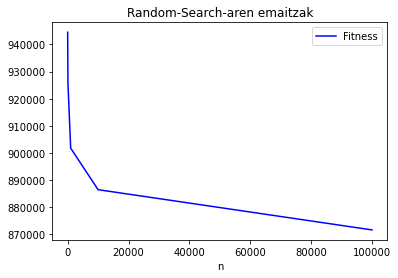

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

list_budget = []
list_best = []
repetitions=10

# Egin exekuzioak budget desberdinetarako: 10, 100, 1000, 10000...
for exp in range(1,6):
    budget=10**exp
    avg_fit=0
    for rep in range(repetitions+1):
        (fitness,sol)=random_search(instance,budget)
        avg_fit+=fitness
    avg_fit=avg_fit/repetitions
    print("Budget: ",budget," Average fitness: ",avg_fit)
    list_budget.append(budget)
    list_best.append(avg_fit)

# Datuak gordetzeko egitura
datuak = pd.DataFrame({"n":list_budget,"Fitness":list_best}) 
print(datuak)

#Irudikatu emaitzak plot batean.
ax = plt.gca()
datuak.plot(kind='line',x='n',y='Fitness', color='blue', ax=ax,title='Random-Search-aren emaitzak')

plt.show()

In [ ]:
'''
Grafikan ikusi daiteken bezala, ausaz geroz eta soluzio kopuru handiagoa aztertuz, soluzio hobe batera iritsiko da.
Hala ere, n exponentzialki handitzen doa, baina fitness-hoberena ez da hainbeste hobetzen. Honek esan nahi du lortutako
soluziok nahiko onak direla (hala ere, oso zaila optimoa izatea). 

Random Search aurreko Brute Forcerekin alderatuta diferentzia handia dagoela ikusisten da. Egia da bilaketa espazioa txikia 
denean Brute Forcer-k soluzio hoberena lortzen duela. Baina, errealitateko problema batean bilaketa espazio gutxitan 
izango da txikia. Brute Forcen 'tai20a.dat' problemak orduak eta orduak emango zituen amaitzeko (ez dut itxoin),
baina Random Search-ek azkar amaitu du soluzio nahiko on bat emanez.

Beraz, lortutako ondorioa hurrengoa da:
    - Brute Force ez da bideragarria bilaketa espazioa handia denean. 
    - Random Search-ek emaitza onak eman ditzazke eta erabilgarria izan daiteke. Hala ere, ez da gomendagarria beti hau 
      erabiltzea, soluzio hobeak ematen dituzten algoritmoak egongo dira seguruen (beti ere problemaren arabera).
'''